In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(context="notebook", style="darkgrid")

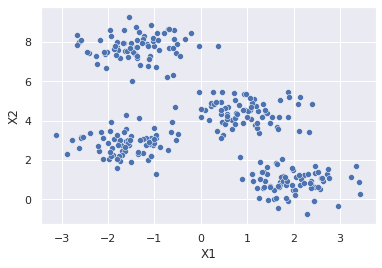

In [105]:
from sklearn.datasets import make_blobs
X, y_true=make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
df=pd.DataFrame(X)
df.columns=['X1','X2']
sns.scatterplot(data=df, x='X1', y='X2')

In [106]:
p1=(np.quantile(df['X1'] ,0.25)  ,np.quantile(df['X2'] ,0.25)  )
p2=(np.quantile(df['X1'] ,0.25)  ,np.quantile(df['X2'] ,0.75)  )
p3=(np.quantile(df['X1'] ,0.75)  ,np.quantile(df['X2'] ,0.25)  )
p4=(np.quantile(df['X1'] ,0.75)  ,np.quantile(df['X2'] ,0.75)  )

tb_centroids=pd.DataFrame([p1,p2,p3,p4],columns=['X1','X2'],index=['p1','p2','p3','p4'] )
tb_centroids

,X1,X2
p1,-1.498837,1.916025
p2,-1.498837,5.607633
p3,1.433350,1.916025
p4,1.433350,5.607633


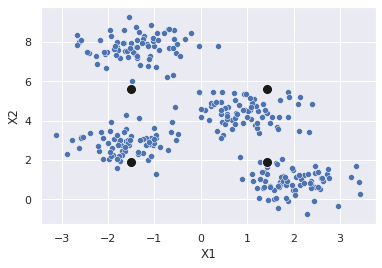

In [107]:
sns.scatterplot(data=df, x='X1', y='X2')
sns.scatterplot(data=tb_centroids, x='X1', y='X2',color='k',s=100)

In [108]:
for centroid in tb_centroids.iterrows():
  centroid_name=centroid[0]
  centroid_x1=centroid[1]['X1']
  centroid_x2=centroid[1]['X2']
  #p1(x1,y1) p2(x2,y2) la distancia es (x1-x2)**2+(y1-y2)**2
  df[centroid_name]=(df['X1']-centroid_x1)**2+(df['X2']-centroid_x2)**2

df.head()

,X1,X2,p1,p2,p3,p4
0,0.836857,2.136359,5.504011,17.505205,0.404351,12.405544
1,-1.413658,7.409623,30.186872,3.254424,38.285072,11.352624
2,1.155213,5.099619,17.179247,7.302058,10.212627,0.335439
3,-1.018616,7.814915,35.027506,5.102704,40.809033,10.884231
4,1.271351,1.892542,7.674494,21.475843,0.026795,13.828144


In [109]:
df[['p1','p2','p3','p4']].idxmin(1)

0      p3
1      p2
2      p4
3      p2
4      p3
       ..
295    p3
296    p3
297    p4
298    p4
299    p1
Length: 300, dtype: object

In [110]:
df['cluster']=df[['p1','p2','p3','p4']].idxmin(1)
df.head()

,X1,X2,p1,p2,p3,p4,cluster
0,0.836857,2.136359,5.504011,17.505205,0.404351,12.405544,p3
1,-1.413658,7.409623,30.186872,3.254424,38.285072,11.352624,p2
2,1.155213,5.099619,17.179247,7.302058,10.212627,0.335439,p4
3,-1.018616,7.814915,35.027506,5.102704,40.809033,10.884231,p2
4,1.271351,1.892542,7.674494,21.475843,0.026795,13.828144,p3


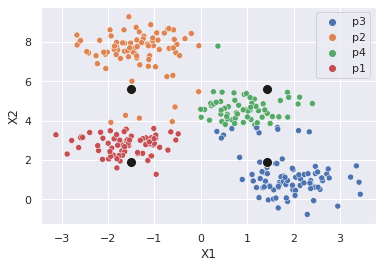

In [111]:
sns.scatterplot(data=df, x='X1', y='X2',hue='cluster')
sns.scatterplot(data=tb_centroids, x='X1', y='X2',color='k',s=100)

In [112]:
tb_centroids=df.groupby('cluster')[['X1','X2']].mean()
tb_centroids

,X1,X2
cluster,,
p1,-1.596219,2.761201
p2,-1.368288,7.502143
p3,1.884543,1.201490
p4,0.933740,4.615895


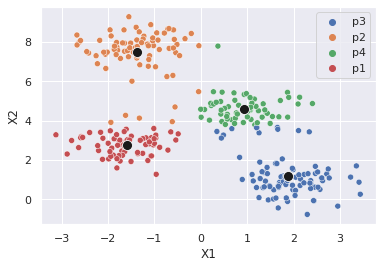

In [113]:
sns.scatterplot(data=df, x='X1', y='X2',hue='cluster')
sns.scatterplot(data=tb_centroids, x='X1', y='X2',color='k',s=100)

In [114]:
for centroid in tb_centroids.iterrows():
  centroid_name=centroid[0]
  centroid_x1=centroid[1]['X1']
  centroid_x2=centroid[1]['X2']
  #p1(x1,y1) p2(x2,y2) la distancia es (x1-x2)**2+(y1-y2)**2
  df[centroid_name]=(df['X1']-centroid_x1)**2+(df['X2']-centroid_x2)**2

df.head()

df['cluster']=df[['p1','p2','p3','p4']].idxmin(1)
df.head()

tb_centroids=df.groupby('cluster')[['X1','X2']].mean()
tb_centroids

,X1,X2
cluster,,
p1,-1.584385,2.830813
p2,-1.373244,7.753689
p3,1.982583,0.867713
p4,0.949735,4.419069


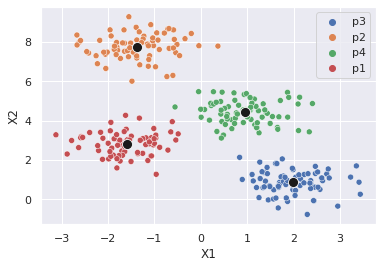

In [115]:
sns.scatterplot(data=df, x='X1', y='X2',hue='cluster')
sns.scatterplot(data=tb_centroids, x='X1', y='X2',color='k',s=100)

In [122]:
for centroid in tb_centroids.iterrows():
  centroid_name=centroid[0]
  centroid_x1=centroid[1]['X1']
  centroid_x2=centroid[1]['X2']
  #p1(x1,y1) p2(x2,y2) la distancia es (x1-x2)**2+(y1-y2)**2
  df[centroid_name]=(df['X1']-centroid_x1)**2+(df['X2']-centroid_x2)**2

df.head()

df['cluster']=df[['p1','p2','p3','p4']].idxmin(1)
df.head()

,X1,X2,p1,p2,p3,p4,cluster
0,0.836857,2.136359,6.344676,36.438934,2.922151,5.223505,p3
1,-1.413658,7.409623,20.994654,0.120014,54.331040,14.529043,p2
2,1.155213,5.099619,12.652877,13.437181,18.593567,0.505369,p4
3,-1.018616,7.814915,25.161367,0.129509,57.270805,15.406175,p2
4,1.271351,1.892542,9.035580,41.346925,1.556124,6.486776,p3


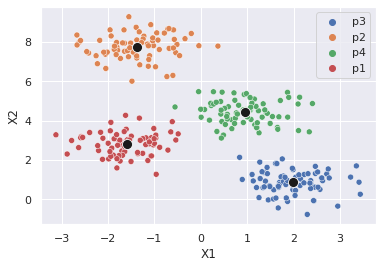

In [123]:
sns.scatterplot(data=df, x='X1', y='X2',hue='cluster')
sns.scatterplot(data=tb_centroids, x='X1', y='X2',color='k',s=100)

In [124]:
'''
array([[-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]
'''

p1,p2,p3,p4

((-1.4988366887033364, 1.9160254168821753),
 (-1.4988366887033364, 5.607632969131007),
 (1.4333499893165682, 1.9160254168821753),
 (1.4333499893165682, 5.607632969131007))

In [88]:
from sklearn.cluster import KMeans

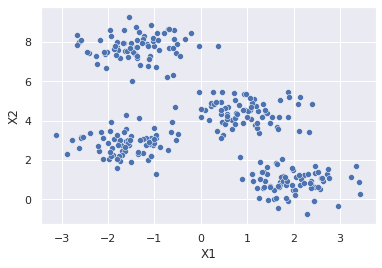

In [89]:
from sklearn.datasets import make_blobs
X, y_true=make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
df=pd.DataFrame(X)
df.columns=['X1','X2']
sns.scatterplot(data=df, x='X1', y='X2')

In [101]:
km_fit=KMeans(n_clusters=4)
km_fit.fit(df[['X1','X2']])

KMeans(n_clusters=4)

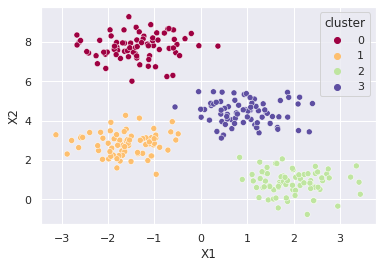

In [102]:
df['cluster']=km_fit.predict(df[['X1','X2']])
sns.scatterplot(data=df,x='X1',y='X2',hue='cluster',palette='Spectral')

In [103]:
km_fit.cluster_centers_

array([[-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [127]:
############## ejercicio
data=pd.read_csv('acs2017_census_tract_data.csv',index_col=0)
data=data.dropna()
data.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


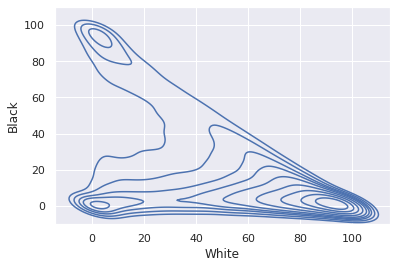

In [128]:
sns.kdeplot(data=data,x='White',y='Black',fill=False)

In [129]:
km_fit=KMeans(n_clusters=3)
km_fit.fit(data[['White','Black']])

data['racial_cluster']=km_fit.predict(data[['White','Black']])

In [143]:
from seaborn.distributions import kdeplot
#sns=kdeplot(data=data,x='White',y='Black',
#            hue='racial_cluster',fill=True,palette='Spectral',common_norm=False)

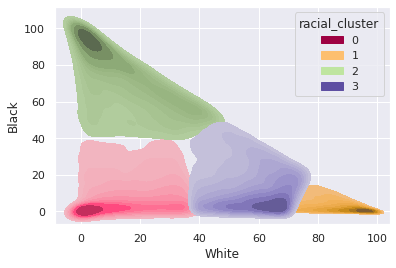

In [135]:
km_fit=KMeans(n_clusters=4)
km_fit.fit(data[['White','Black']])

data['racial_cluster']=km_fit.predict(data[['White','Black']])

from seaborn.distributions import kdeplot
sns=kdeplot(data=data,x='White',y='Black',
            hue='racial_cluster',fill=True,palette='Spectral',common_norm=False)

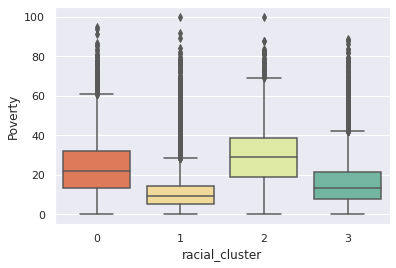

In [148]:
sns.boxplot(data=data,x='racial_cluster',y='Poverty',palette='Spectral')

In [149]:
#Clustering on n-dimensions

cluster_vars = [
    "IncomePerCap",
    "Poverty",
    "Professional",
    "Service",
    "Office",
    "Construction",
    "Production",
    "OtherTransp",
    "WorkAtHome",
    "MeanCommute",
    "Employed",
    "PrivateWork",
    "PublicWork",
    "SelfEmployed",
]

In [150]:
data.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,racial_cluster
count,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,...,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000
mean,4443.485121,2184.362647,2259.122473,17.282951,61.337143,13.254417,0.727776,4.752459,0.146082,3141.161982,...,1.886076,4.612646,26.080334,2081.309139,79.511827,14.149495,6.167661,0.171231,7.224917,1.472428
std,2190.183318,1099.954423,1124.604806,23.084428,30.628031,21.581269,4.505791,8.995573,1.015198,1512.610257,...,2.485812,3.770733,7.095680,1120.109805,7.957350,7.164790,3.798703,0.451630,5.099419,1.046522
min,58.000000,26.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,4.200000,20.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2958.000000,1440.000000,1494.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,2096.000000,...,0.400000,2.000000,21.100000,1306.000000,75.300000,9.300000,3.500000,0.000000,3.900000,1.000000
50%,4137.000000,2024.000000,2102.000000,7.400000,70.500000,3.800000,0.000000,1.500000,0.000000,2926.000000,...,1.200000,3.800000,25.400000,1915.000000,80.600000,13.000000,5.500000,0.000000,6.000000,1.000000
75%,5532.750000,2719.000000,2817.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,3923.000000,...,2.500000,6.300000,30.300000,2651.000000,85.000000,17.600000,8.000000,0.000000,9.000000,3.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,99.400000,91.400000,71.900000,39389.000000,...,53.400000,82.800000,73.900000,28945.000000,100.000000,80.700000,47.400000,22.300000,62.800000,3.000000


In [163]:
scalar=StandardScaler()
scalar.fit(data[cluster_vars])

data2=pd.DataFrame(scalar.transform(data[cluster_vars]),columns=cluster_vars)

data2.describe()

,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed
count,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04,7.271800e+04
mean,1.563393e-17,-8.911342e-17,-3.861582e-16,-3.314394e-16,-2.251286e-16,-8.833172e-17,2.024594e-16,1.027931e-16,-1.078741e-16,-1.235081e-16,1.876072e-16,-7.504288e-16,2.001143e-16,-1.305433e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.832594e+00,-1.291117e+00,-2.364157e+00,-2.364994e+00,-4.187416e+00,-1.558436e+00,-1.701993e+00,-7.587419e-01,-1.223284e+00,-3.083635e+00,-1.840287e+00,-7.793078e+00,-1.974879e+00,-1.623634e+00
25%,-6.338451e-01,-7.359442e-01,-7.217261e-01,-6.961429e-01,-6.640950e-01,-7.172243e-01,-7.536837e-01,-5.978275e-01,-6.928797e-01,-7.018874e-01,-6.921772e-01,-5.293038e-01,-6.768557e-01,-7.022607e-01
50%,-2.157062e-01,-2.773230e-01,-1.498677e-01,-1.440417e-01,-3.812422e-02,-1.452004e-01,-1.478193e-01,-2.759988e-01,-2.155156e-01,-9.588064e-02,-1.484768e-01,1.367517e-01,-1.604378e-01,-1.757616e-01
75%,3.626824e-01,4.629078e-01,6.148267e-01,5.460847e-01,6.236163e-01,5.445931e-01,6.029256e-01,2.469728e-01,4.474901e-01,5.946852e-01,5.086062e-01,6.897033e-01,4.815952e-01,4.823624e-01
max,1.196580e+01,6.754869e+00,3.766698e+00,6.531363e+00,8.743351e+00,9.898866e+00,6.266440e+00,2.072332e+01,2.073546e+01,6.739311e+00,2.398325e+01,2.574766e+00,9.288613e+00,1.085440e+01


In [164]:

pca=PCA(n_components=4)
pca.fit(data2)

data2_pca=pd.DataFrame(pca.transform(data2))

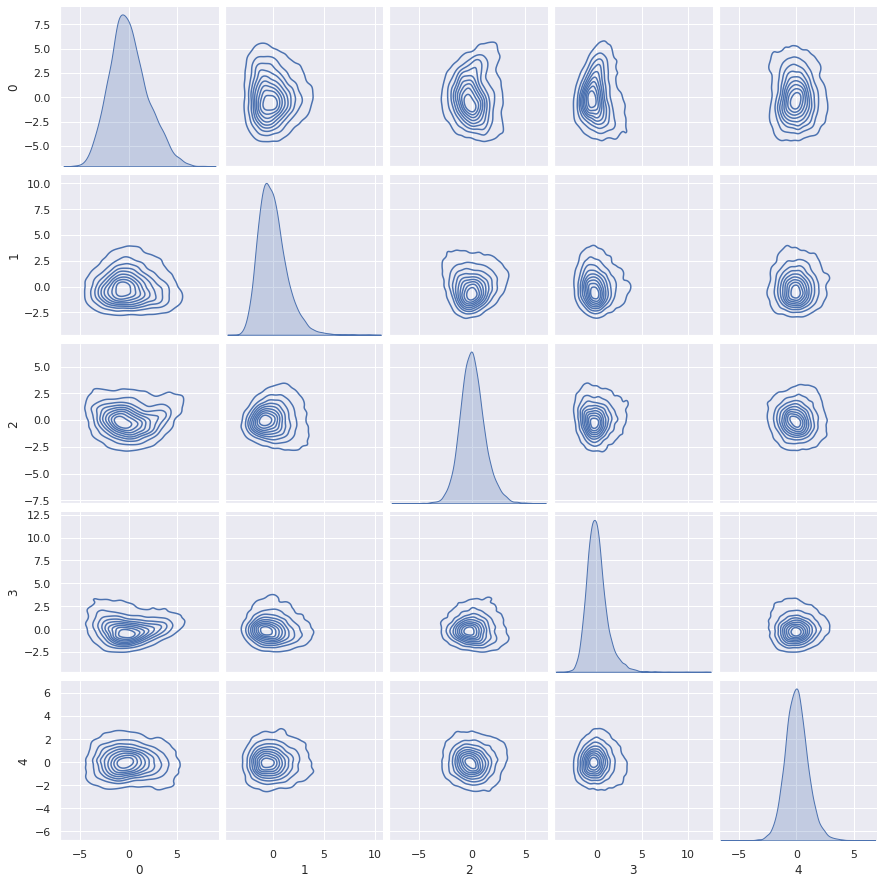

In [154]:
sns.pairplot(data=data2_pca.sample(10000),kind='kde') #kde=kernel densisty estimation

In [166]:
#data2.drop('cluster',axis=1)
km_fit=KMeans(n_clusters=5)
km_fit.fit(data2)

data2['cluster']=km_fit.predict(data2[cluster_vars])
data2_pca['cluster']=km_fit.predict(data2[cluster_vars])


In [171]:
data['cluster']=km_fit.predict(data2[cluster_vars])

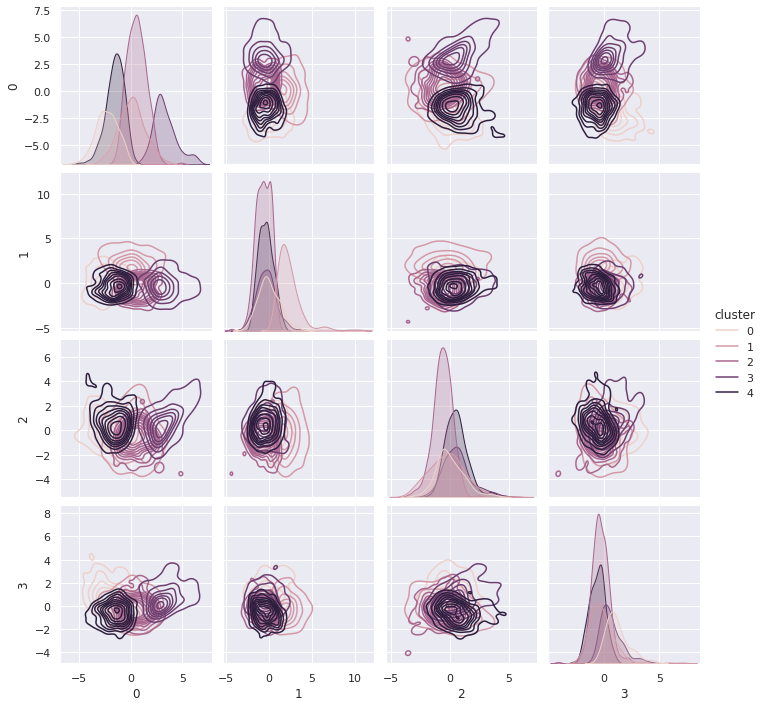

In [167]:
sns.pairplot(data=data2_pca.sample(1000),kind='kde',hue='cluster')

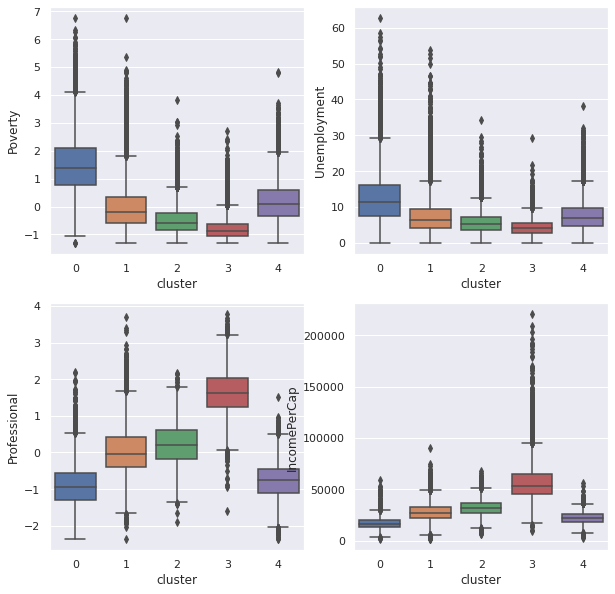

In [179]:


fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data=data2,x='cluster',y='Poverty',ax=ax[0][0])
sns.boxplot(data=data,x='cluster',y='Unemployment',ax=ax[0][1])
sns.boxplot(data=data2,x='cluster',y='Professional',ax=ax[1][0])
sns.boxplot(data=data,x='cluster',y='IncomePerCap',ax=ax[1][1])